# 6.4 Supervised Machine Learning: Regression

## Table of Contents

1. Notebook Prep
    Import libraries
    Display graphs inline
    Define 'path' variable
    Import dataframe

2. Data cleaning
    Missing Values
    Duplicates

3. Data Exploration
    Show columns
    Create scatterplots of variables

4. Hypothesis for Exploration by Regression

5. Data Preparation for Regression Analysis
    Reshape the variables for NumPy arrays
    Split data into training set and test set

6. Linear Regression
    Create regression object
    Fit the regression object to the training data
    Predict y-values
    Plot regression line

7. Regression Interpretation

8. Model Performance Statistics
    Define Statistics Variables
    Display Statistics Variables

9. Comparison of Predicted and Actual y-values

10. Overall Thoughts

### 1. Notebook Prep

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Display graphs inline

%matplotlib inline

In [3]:
# Define 'path' variable

path = r'D:\Achievement 6'

In [4]:
# Import dataframe

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'births_finances_combined.csv'))

### 2. Data Cleaning

In [5]:
# Missing Values

df.isnull().sum()

Unnamed: 0                             0
state                                  0
year                                   0
education_level                        0
education_code                         0
number_of_births                       0
avg_mother_age                         0
avg_birth_weight_grams                 0
ref_year                               0
enrolled                               0
total_revenue                          0
federal_revenue                        0
state_revenue                          0
local_revenue                          0
total_expenditure                      0
instruction_expenditure                0
support_services_expenditure           0
other_expenditure                      0
capital_outlay_expenditure             0
total_expenditure_per_student          0
instruction_expenditure_per_student    0
support_expenditure_per_student        0
7yr_avg_total_per_student              0
7yr_avg_instruction_per_student        0
7yr_avg_support_

No missing values

In [6]:
# Duplicates

dups = df.duplicated()

In [7]:
dups.shape

(2750,)

No duplicates

### 3. Data Exploration

In [9]:
# Show columns

df.columns

Index(['Unnamed: 0', 'state', 'year', 'education_level', 'education_code',
       'number_of_births', 'avg_mother_age', 'avg_birth_weight_grams',
       'ref_year', 'enrolled', 'total_revenue', 'federal_revenue',
       'state_revenue', 'local_revenue', 'total_expenditure',
       'instruction_expenditure', 'support_services_expenditure',
       'other_expenditure', 'capital_outlay_expenditure',
       'total_expenditure_per_student', 'instruction_expenditure_per_student',
       'support_expenditure_per_student', '7yr_avg_total_per_student',
       '7yr_avg_instruction_per_student', '7yr_avg_support_per_student'],
      dtype='object')

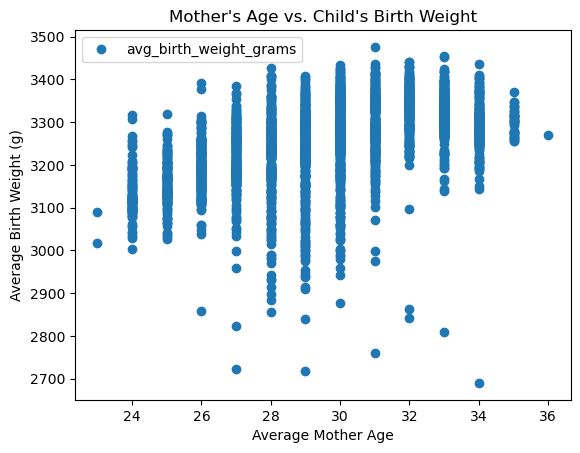

In [10]:
# Create scatterplots of variables

df.plot(x = 'avg_mother_age', y = 'avg_birth_weight_grams', style = 'o')
plt.title('Mother\'s Age vs. Child\'s Birth Weight')
plt.xlabel('Average Mother Age')
plt.ylabel('Average Birth Weight (g)')
plt.show()

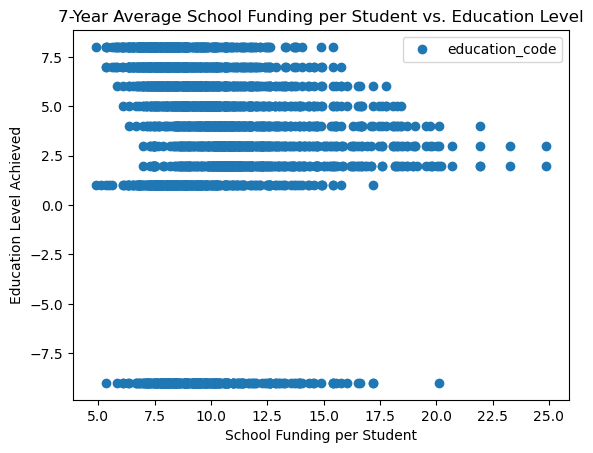

In [14]:
df.plot(x = '7yr_avg_total_per_student', y = 'education_code', style = 'o')
plt.title('7-Year Average School Funding per Student vs. Education Level')
plt.xlabel('School Funding per Student')
plt.ylabel('Education Level Achieved')
plt.show()

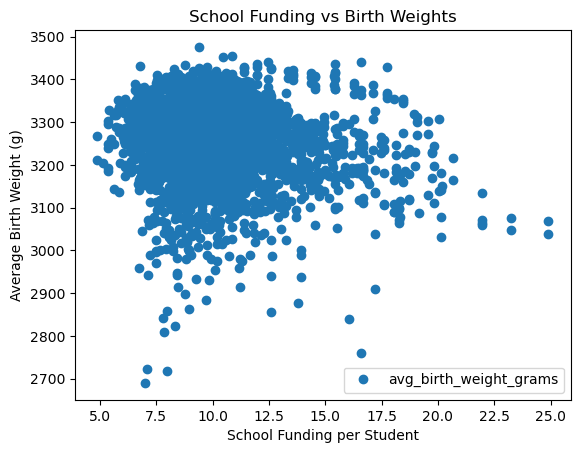

In [12]:
df.plot(x = '7yr_avg_total_per_student', y = 'avg_birth_weight_grams', style = 'o')
plt.title('School Funding vs Birth Weights')
plt.xlabel('School Funding per Student')
plt.ylabel('Average Birth Weight (g)')
plt.show()

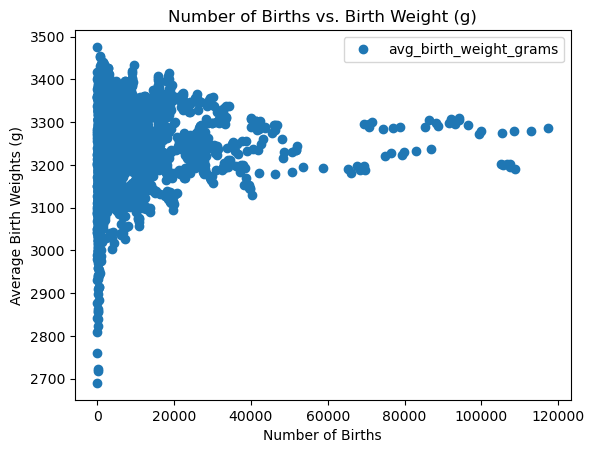

In [13]:
df.plot(x = 'number_of_births', y = 'avg_birth_weight_grams', style = 'o')
plt.title('Number of Births vs. Birth Weight (g)')
plt.xlabel('Number of Births')
plt.ylabel('Average Birth Weights (g)')
plt.show()

### 4. Hypothesis for Exploration by Regression

The data set does not contain many continuous variables to use as an independent variable; the most significant continuous variables are decidedly dependent variables of choice. While I would like to pursue the connection between a mother's age and her child's birth weight in a later task, this one seems to call for something else.

Hypothesis: School funding during a mother's tenure in public school has little relationship to the mother's future child's birth weight, but there is an interesting artifact in the data. As funding increases, the average birth weight seems to decrease. At first, it would make intuitive sense to say higher funding leads to higher levels of learning, but the data does not seem to accept this explanation as higher funding seems to lead to finishing high school, but no further (at least not at a level I can intuit without further exploration in the future). Perhaps the number of subsequent children a mother has is a more reliable metric for birth weight (something we do not have data for), and perhaps those who finish high school or lower are more likely to have more children. We don't yet know.

### 5. Data Preparation for Regression Analysis

In [15]:
# Reshape the variables into NumPy arrays

X = df['7yr_avg_total_per_student'].values.reshape(-1,1)
y = df['avg_birth_weight_grams'].values.reshape(-1,1)

In [17]:
# Split data into a training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 6. Linear Regression

In [18]:
# Create regression object

regression = LinearRegression()

In [19]:
# Fit the regression object to the training data

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict y-values

y_predicted = regression.predict(X_test)

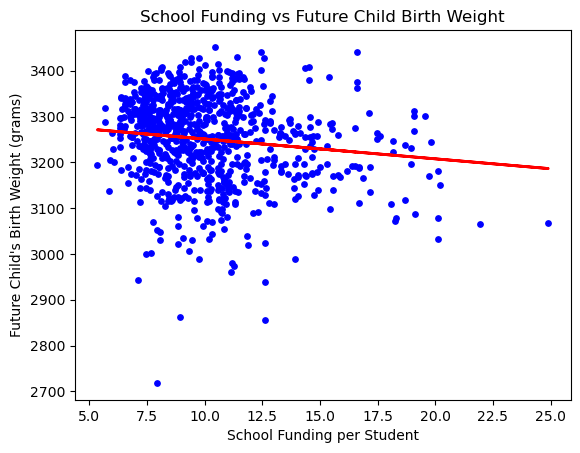

In [22]:
# Plot regression line

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'blue', s =15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 2)
plot_test.title('School Funding vs Future Child Birth Weight')
plot_test.xlabel('School Funding per Student')
plot_test.ylabel('Future Child\'s Birth Weight (grams)')
plot_test.show()

### 7. Regression Interpretation

The data is quite variable at lower levels of school funding, though perhaps it would also be more variable at higher levels if more data were available at higher funding. The regression does not seem to fit the data particularly well (with a large amount of data varying by |~150 g|. While viewing the data numerically, that may sound pretty good, but natural birth weights are a pretty narrow window, and 150 g either way seems too large to use for predictive analysis between these two variables.

### 8. Model Performance Statistics

In [24]:
# Define Statistic Variables 

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [26]:
# Display Statistic Variables

print('Slope: ', regression.coef_)
print('Mean Squared Error: ', rmse)
print('R2 Score: ', r2)

Slope:  [[-4.3279346]]
Mean Squared Error:  8641.943445806435
R2 Score:  0.03553914050493434


### 9. Comparison of Predicted and Actual y-values

In [27]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

In [28]:
data.head(50)

,Actual,Predicted
0,3173.65,3262.097426
1,3250.10,3218.699175
2,3290.25,3249.162848
3,3362.70,3222.447734
4,3399.90,3261.662691
5,3220.05,3259.508967
6,3224.90,3261.333661
7,3336.30,3257.362139
8,3289.60,3241.842842
9,3168.75,3247.467130


### 10. Overall Thoughts

The model does not fit this particularly chosen data, confirming suspicions of their irrelevance to each other.  The r2 value was very low while the mean squared error was very high. Linear predictability between these two variables seems practically nonexistent.  I do not think data bias had very much of an impact. In fact, I suspect if more states increased funding, we would simply see the regression line flatten horizontally. If anything, the miniscule correlation may be an artifact of bias, itself. 